# **Pembelajaran Mesin: Tugas Besar 1**

Wahyu Hauzan Rafi
IF-43-05
1301191313

## **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **Import Dataset**

In [2]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/whauzan/K-Means-Clustering-Machine-Learning-Task-1/main/dataset/raw/kendaraan_train.csv')
df_raw.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [3]:
len(df_raw)

285831

## **Data Preprocessing**
### **Drop Empty Data**

In [4]:
df_nonEmpty = df_raw.dropna(how='any')
len(df_nonEmpty)

171068

### **Check If there's still Empty Data**

In [19]:
df_nonEmpty.isna().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

### **Drop Categorical Data**

In [7]:
df_nonEmpty_nonCategorical = df_nonEmpty.drop(axis=1, columns=['Jenis_Kelamin', 'SIM', 'Sudah_Asuransi' ,'Umur_Kendaraan', 'Kendaraan_Rusak'])
df_nonEmpty_nonCategorical.head()

,id,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,33.0,28029.0,152.0,97.0,0
1,2,48.0,39.0,25800.0,29.0,158.0,0
3,4,58.0,48.0,2630.0,124.0,63.0,0
5,6,21.0,35.0,22735.0,152.0,171.0,0
8,9,20.0,8.0,30786.0,160.0,31.0,0


### **Checking Outlier**

(<AxesSubplot:title={'center':'Lama Berlangganan'}>,
 {'whiskers': [<matplotlib.lines.Line2D at 0x2ac67cce160>,
  'caps': [<matplotlib.lines.Line2D at 0x2ac67cce880>,
  'boxes': [<matplotlib.lines.Line2D at 0x2ac67cbfd90>],
  'medians': [<matplotlib.lines.Line2D at 0x2ac67ccefa0>],
  'fliers': [<matplotlib.lines.Line2D at 0x2ac67cdb370>],
  'means': []},
 Text(0.5, 1.0, 'Lama Berlangganan'))

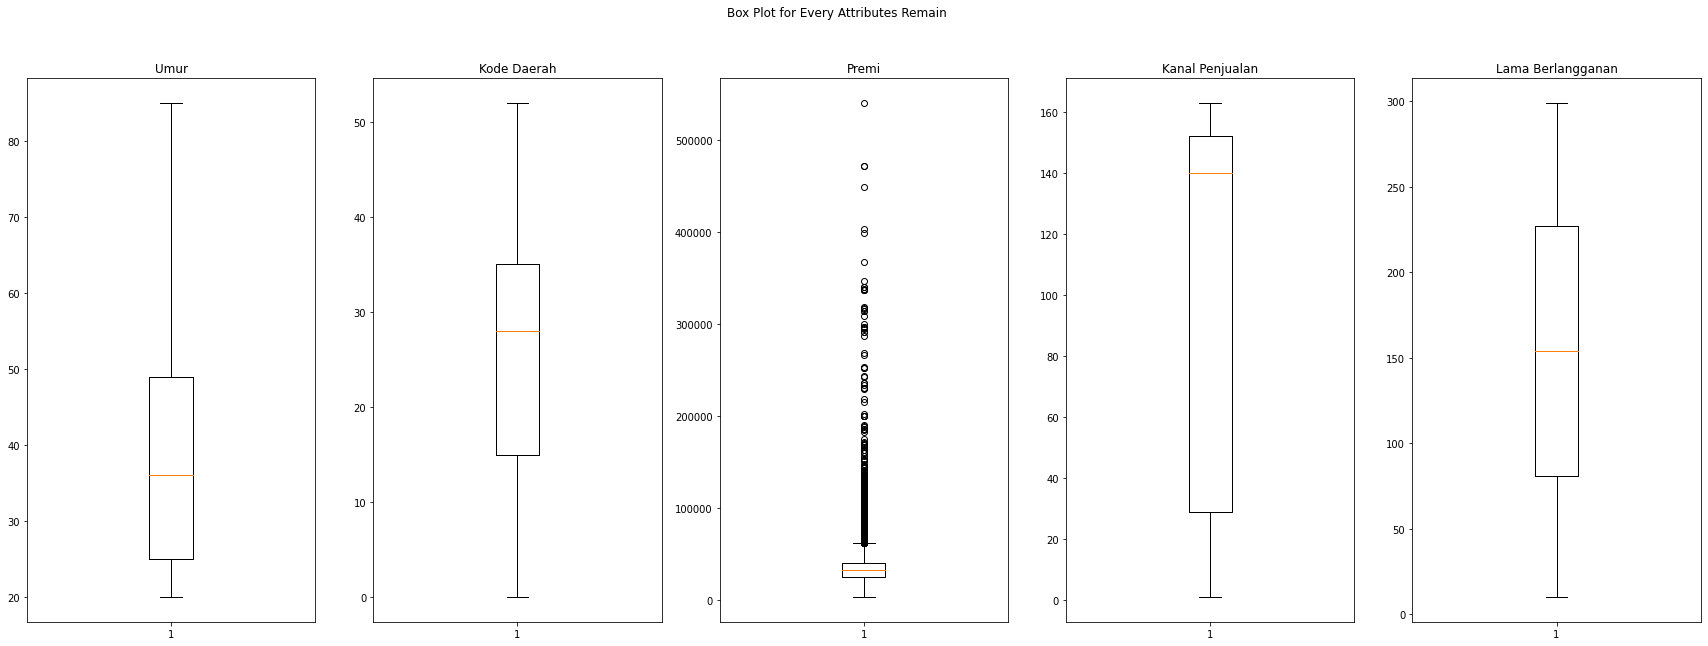

In [10]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('Box Plot for Every Attributes Remain')
fig.add_subplot(1,5,1), plt.boxplot(df_nonEmpty_nonCategorical['Umur']), plt.title('Umur')
fig.add_subplot(1,5,2), plt.boxplot(df_nonEmpty_nonCategorical['Kode_Daerah']), plt.title('Kode Daerah')
fig.add_subplot(1,5,3), plt.boxplot(df_nonEmpty_nonCategorical['Premi']), plt.title('Premi')
fig.add_subplot(1,5,4), plt.boxplot(df_nonEmpty_nonCategorical['Kanal_Penjualan']), plt.title('Kanal Penjualan')
fig.add_subplot(1,5,5), plt.boxplot(df_nonEmpty_nonCategorical['Lama_Berlangganan']), plt.title('Lama Berlangganan')

### **Drop Outlier Data in Premi With IQR Method**

In [12]:
describe = df_nonEmpty_nonCategorical.describe()
# describe
iqr_premi = float(describe["Premi"].loc["75%"] - describe["Premi"].loc["25%"])
q1_bound = float(describe["Premi"].loc["25%"]) - (iqr_premi * 1.5)
q2_bound = float(describe["Premi"].loc["75%"]) + (iqr_premi * 1.5)
df_final = df_nonEmpty_nonCategorical.copy()
df_final.reset_index(drop=True, inplace=True)
df_final = df_final[(df_final["Premi"] > q1_bound) & (df_final["Premi"] < q2_bound)]
len(df_final)

166396

(<AxesSubplot:title={'center':'Lama Berlangganan'}>,
 {'whiskers': [<matplotlib.lines.Line2D at 0x2ac694d1280>,
  'caps': [<matplotlib.lines.Line2D at 0x2ac694d19a0>,
  'boxes': [<matplotlib.lines.Line2D at 0x2ac694c4eb0>],
  'medians': [<matplotlib.lines.Line2D at 0x2ac694de100>],
  'fliers': [<matplotlib.lines.Line2D at 0x2ac694de490>],
  'means': []},
 Text(0.5, 1.0, 'Lama Berlangganan'))

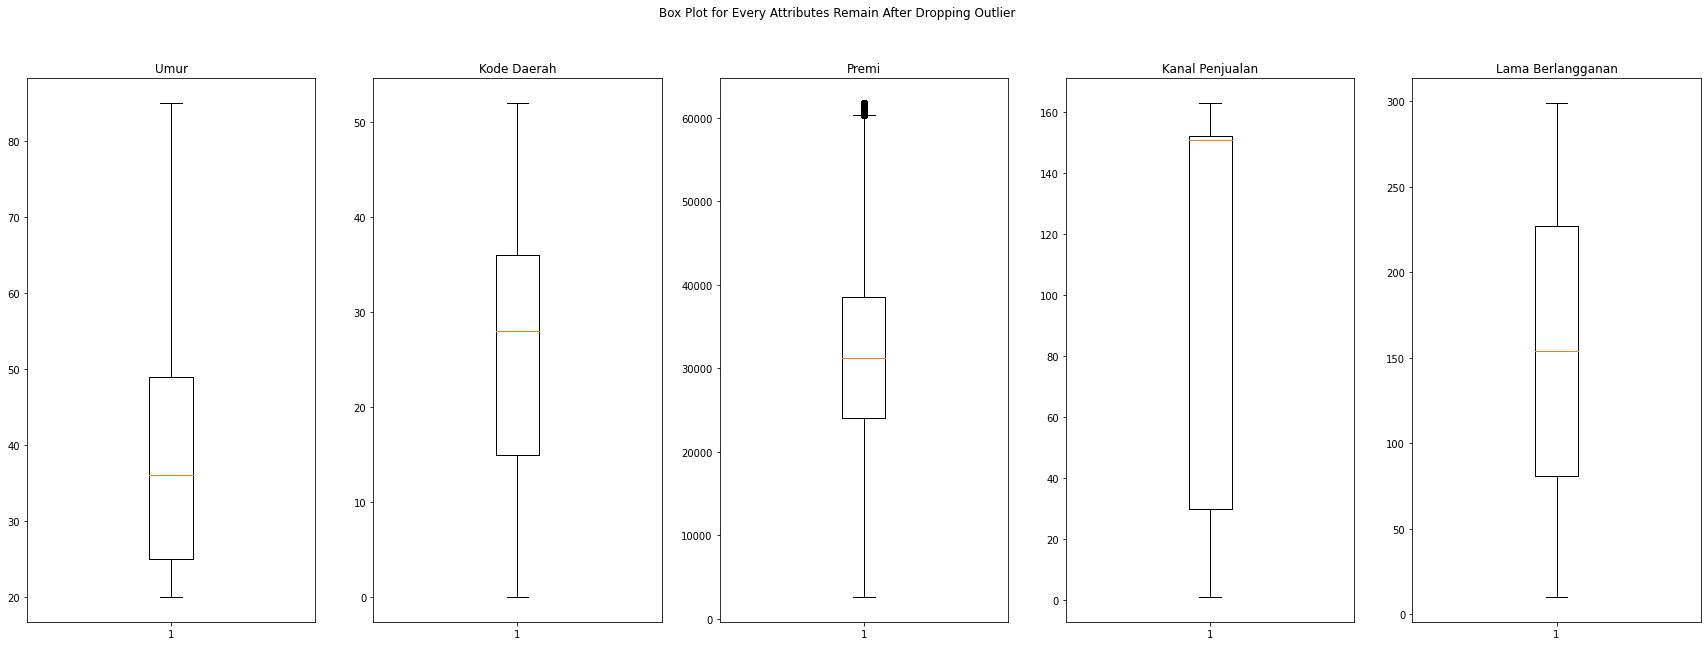

In [14]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('Box Plot for Every Attributes Remain After Dropping Outlier')
fig.add_subplot(1,5,1), plt.boxplot(df_final['Umur']), plt.title('Umur')
fig.add_subplot(1,5,2), plt.boxplot(df_final['Kode_Daerah']), plt.title('Kode Daerah')
fig.add_subplot(1,5,3), plt.boxplot(df_final['Premi']), plt.title('Premi')
fig.add_subplot(1,5,4), plt.boxplot(df_final['Kanal_Penjualan']), plt.title('Kanal Penjualan')
fig.add_subplot(1,5,5), plt.boxplot(df_final['Lama_Berlangganan']), plt.title('Lama Berlangganan')

### **Saving Clean Dataset**
You don't need to run this cell. It's just saving our clean dataframe to csv or xlsx file

In [18]:
df_final.to_csv('../dataset/clean/kendaraan_train.csv', header=True, index=True)
df_final.to_excel('../dataset/clean/kendaraan_train.xlsx', header=True, index=True)